# Unsupervised ML

As a marketing strategist I want to segment customers into meaningful behavioral groups So that we can develop targeted marketing campaigns and personalized strategies

## Requirements:

-  Apply KMeans clustering (k=5) on RFM features to identify customer segments
-  Use Gaussian Mixture Models for probabilistic cluster assignments
-  Implement PCA for dimensionality reduction and cluster visualization
-  Validate clusters using business metrics (average spend, purchase frequency, recency)
-  Create detailed customer personas for each segment with characteristic patterns
-  Analyze segment distribution across different countries and product categories
-  Use silhouette scores to optimize number of clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import  KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import joblib

In [2]:
rfm_std = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\rfm_std.csv")
RFM = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\RFM.csv")
data = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\data.csv")

In [3]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,CLV
0,12347.0,2,7,4310.00,5.0
1,12348.0,75,4,1797.24,3.4
2,12349.0,19,1,1457.55,2.8
3,12350.0,310,1,334.40,1.3
4,12352.0,36,7,1665.74,4.1


In [4]:
RFM_Cluster_mms = RFM.copy()
RFM_Cluster_mms.drop('CustomerID', axis=1, inplace=True)

In [5]:
scaler = MinMaxScaler()
matrex_std = scaler.fit_transform(RFM_Cluster_mms)
matrex_std

array([[2.68096515e-03, 2.89855072e-02, 1.62406832e-02, 1.00000000e+00],
       [1.98391421e-01, 1.44927536e-02, 6.76587670e-03, 6.00000000e-01],
       [4.82573727e-02, 0.00000000e+00, 5.48501540e-03, 4.50000000e-01],
       ...,
       [1.87667560e-02, 4.83091787e-03, 6.60434089e-04, 5.00000000e-01],
       [8.04289544e-03, 7.24637681e-02, 7.70209811e-03, 1.00000000e+00],
       [1.12600536e-01, 9.66183575e-03, 6.91685461e-03, 6.75000000e-01]])

In [6]:
joblib.dump(scaler, 'MinMaxScaler_rmf.pkl')

['MinMaxScaler_rmf.pkl']

In [7]:
RFM_Cluster_scaler = pd.DataFrame(matrex_std, columns=RFM_Cluster_mms.columns)

In [8]:
RFM_Cluster_scaler.head()

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,1.000
1,0.198391,0.014493,0.006766,0.600
2,0.048257,0.000000,0.005485,0.450
3,0.828418,0.000000,0.001250,0.075
4,0.093834,0.028986,0.006270,0.775


# 1. KMeans clustering (k=5) on RFM

In [9]:
KMeans_5 = KMeans(n_clusters=5)
KMeans_5.fit(RFM_Cluster_scaler)
y_pred_5 = KMeans_5.predict(RFM_Cluster_scaler)
print("Score for 5 clusters            = ",KMeans_5.inertia_)
print("Silhouette Score for 5 clusters = " , silhouette_score(RFM_Cluster_scaler ,y_pred_5))

Score for 5 clusters            =  83.98109892719438
Silhouette Score for 5 clusters =  0.4420284199692662


In [10]:
y_pred_5

array([4, 1, 3, ..., 1, 4, 1], dtype=int32)

In [11]:
RFM_Cluster_mms['cluster_5'] = y_pred_5

In [12]:
RFM_Cluster_mms.head()

,Recency,Frequency,Monetary,CLV,cluster_5
0,2,7,4310.00,5.0,4
1,75,4,1797.24,3.4,1
2,19,1,1457.55,2.8,3
3,310,1,334.40,1.3,2
4,36,7,1665.74,4.1,1


In [13]:
joblib.dump(KMeans_5, 'KMeans_5.pkl')

['KMeans_5.pkl']

# 2. Gaussian Mixture Models

In [14]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(RFM_Cluster_scaler)

,n_components,5
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [15]:
probs = gmm.predict_proba(RFM_Cluster_scaler)

In [16]:
probs

array([[3.37583026e-006, 9.36999506e-001, 5.91909316e-221,
        6.29968212e-002, 2.96855558e-007],
       [4.56223077e-001, 2.01751265e-002, 1.74718676e-052,
        3.97851024e-030, 5.23601796e-001],
       [2.77991053e-001, 4.48519642e-008, 4.93116818e-002,
        7.54595366e-202, 6.72697221e-001],
       ...,
       [1.84969593e-002, 8.02298237e-009, 1.12225940e-007,
        9.19886150e-196, 9.81502920e-001],
       [4.03189694e-037, 4.48187056e-001, 0.00000000e+000,
        5.51812944e-001, 9.18209101e-037],
       [6.68714520e-002, 1.92851080e-002, 3.41736621e-029,
        1.53463341e-032, 9.13843440e-001]])

In [17]:
probs_data = pd.DataFrame(probs.round(3), columns=['C0', 'C1', 'C2', 'C3', 'C4'])
probs_data.head()

,C0,C1,C2,C3,C4
0,0.000,0.937,0.000,0.063,0.000
1,0.456,0.020,0.000,0.000,0.524
2,0.278,0.000,0.049,0.000,0.673
3,0.004,0.000,0.996,0.000,0.000
4,0.004,0.801,0.000,0.000,0.195


In [18]:
probs_customers = pd.concat([RFM['CustomerID'], probs_data], axis=1)

In [19]:
probs_customers.head()

,CustomerID,C0,C1,C2,C3,C4
0,12347.0,0.000,0.937,0.000,0.063,0.000
1,12348.0,0.456,0.020,0.000,0.000,0.524
2,12349.0,0.278,0.000,0.049,0.000,0.673
3,12350.0,0.004,0.000,0.996,0.000,0.000
4,12352.0,0.004,0.801,0.000,0.000,0.195


In [20]:
probs_customers.reset_index(drop=True, inplace=True)
probs_customers.to_csv('probs_customers.csv', index=False)

In [21]:
joblib.dump(gmm, 'gmm_model.pkl')

['gmm_model.pkl']

# 3. PCA for dimensionality reduction and cluster visualization

In [22]:
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(RFM_Cluster_scaler)


KM_pca = KMeans(n_clusters=5, random_state=42)
KM_pca.fit(rfm_pca)
y_pred_pca = KM_pca.predict(rfm_pca)
y_pred_pca

array([1, 4, 2, ..., 4, 1, 4], dtype=int32)

In [23]:
print("Score PCA            = ",KM_pca.inertia_)
print("Silhouette Score PCA = " , silhouette_score(rfm_pca ,y_pred_pca))

Score PCA            =  76.67844217687546
Silhouette Score PCA =  0.4535505593542161


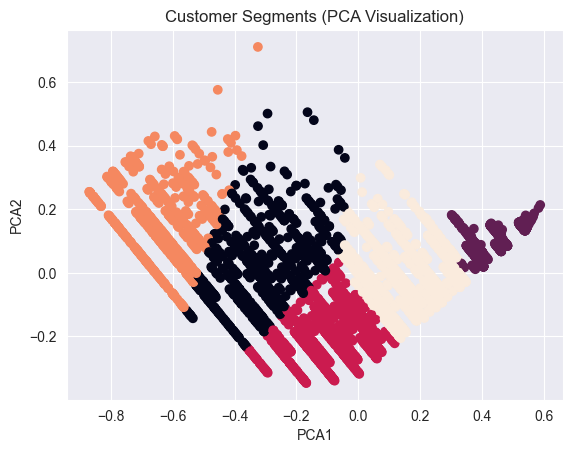

In [24]:
plt.scatter(rfm_pca[:,0], rfm_pca[:,1], c=y_pred_pca)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Customer Segments (PCA Visualization)")
plt.show()

# 4. Validate clusters using business metrics (average spend, purchase frequency, recency)

In [25]:
RFM_5 = RFM.copy()
RFM_5['cluster_5'] = y_pred_5
RFM_5.head()

,CustomerID,Recency,Frequency,Monetary,CLV,cluster_5
0,12347.0,2,7,4310.00,5.0,4
1,12348.0,75,4,1797.24,3.4,1
2,12349.0,19,1,1457.55,2.8,3
3,12350.0,310,1,334.40,1.3,2
4,12352.0,36,7,1665.74,4.1,1


In [26]:
cluster_validation = RFM_5.groupby('cluster_5').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'ClusterSize'}).reset_index()
cluster_validation

,cluster_5,Recency,Frequency,Monetary,ClusterSize
0,0,175.575601,1.914089,592.726840,582
1,1,42.822555,3.464511,1197.292864,1268
2,2,293.573554,1.211570,321.175884,605
3,3,55.465665,1.344421,382.439702,932
4,4,14.545650,11.684211,6115.572954,931


In [27]:
persona_map = {
    0: 'VIP',
    3: 'Loyal',
    1: 'New',
    4: 'At Risk',
    2: 'Lost'
}

cluster_validation['Customer Persona'] = cluster_validation['cluster_5'].map(persona_map)

cluster_validation

,cluster_5,Recency,Frequency,Monetary,ClusterSize,Customer Persona
0,0,175.575601,1.914089,592.726840,582,VIP
1,1,42.822555,3.464511,1197.292864,1268,New
2,2,293.573554,1.211570,321.175884,605,Lost
3,3,55.465665,1.344421,382.439702,932,Loyal
4,4,14.545650,11.684211,6115.572954,931,At Risk


In [28]:
cluster_validation.reset_index(drop=True, inplace=True)
cluster_validation.to_csv('cluster_validation.csv', index=False)

# 5. Detailed customer personas for each segment with characteristic patterns

In [29]:
persona_map = {
    0: 'VIP',
    3: 'Loyal',
    1: 'New',
    4: 'At Risk',
    2: 'Lost'
}

RFM_5['Customer Persona'] = RFM_5['cluster_5'].map(persona_map)

RFM_5.head()

,CustomerID,Recency,Frequency,Monetary,CLV,cluster_5,Customer Persona
0,12347.0,2,7,4310.00,5.0,4,At Risk
1,12348.0,75,4,1797.24,3.4,1,New
2,12349.0,19,1,1457.55,2.8,3,Loyal
3,12350.0,310,1,334.40,1.3,2,Lost
4,12352.0,36,7,1665.74,4.1,1,New


In [30]:
# إضافة وصف لكل Customer Persona
persona_descriptions = {
    'VIP': 'High value customers with high spending, frequent purchases, and recent activity.',
    'Loyal': 'Reliable repeat customers who buy often but spend moderately.',
    'At Risk': 'Customers who used to spend but haven’t purchased recently.',
    'New': 'Recently acquired customers with limited purchase history.',
    'Lost': 'Customers with no recent activity and very low engagement.'
}

RFM_5['Persona Description'] = RFM_5['Customer Persona'].map(persona_descriptions)

RFM_5.head()


,CustomerID,Recency,Frequency,Monetary,CLV,cluster_5,Customer Persona,Persona Description
0,12347.0,2,7,4310.00,5.0,4,At Risk,Customers who used to spend but haven’t purcha...
1,12348.0,75,4,1797.24,3.4,1,New,Recently acquired customers with limited purch...
2,12349.0,19,1,1457.55,2.8,3,Loyal,Reliable repeat customers who buy often but sp...
3,12350.0,310,1,334.40,1.3,2,Lost,Customers with no recent activity and very low...
4,12352.0,36,7,1665.74,4.1,1,New,Recently acquired customers with limited purch...


In [31]:
RFM_5.reset_index(drop=True, inplace=True)
RFM_5.to_csv('RFM_5.csv', index=False)

# 6. Analyze segment distribution across different countries and product categories

In [32]:
RFM_5.head(2)

,CustomerID,Recency,Frequency,Monetary,CLV,cluster_5,Customer Persona,Persona Description
0,12347.0,2,7,4310.00,5.0,4,At Risk,Customers who used to spend but haven’t purcha...
1,12348.0,75,4,1797.24,3.4,1,New,Recently acquired customers with limited purch...


In [33]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter


In [34]:

full_data = pd.merge(RFM_5,
                     data[['CustomerID', 'Country', 'Description']],
                     on='CustomerID', how='left')
full_data.head(2)

,CustomerID,Recency,Frequency,Monetary,CLV,cluster_5,Customer Persona,Persona Description,Country,Description
0,12347.0,2,7,4310.0,5.0,4,At Risk,Customers who used to spend but haven’t purcha...,Iceland,BLACK CANDELABRA T-LIGHT HOLDER
1,12347.0,2,7,4310.0,5.0,4,At Risk,Customers who used to spend but haven’t purcha...,Iceland,AIRLINE BAG VINTAGE JET SET BROWN


In [35]:
cluster_by_country = full_data.groupby(["cluster_5", 'Customer Persona', "Country"]).size().reset_index(name="Count")
cluster_by_country.head(2)

,cluster_5,Customer Persona,Country,Count
0,0,VIP,Australia,30
1,0,VIP,Austria,61


In [36]:
cluster_by_country.reset_index(drop=True, inplace=True)
cluster_by_country.to_csv('cluster_by_country.csv', index=False)

In [37]:
cluster_by_category = full_data.groupby(["cluster_5", 'Customer Persona', "Description"]).size().reset_index(name="Count")
cluster_by_category.head(2)

,cluster_5,Customer Persona,Description,Count
0,0,VIP,4 PURPLE FLOCK DINNER CANDLES,3
1,0,VIP,DOLLY GIRL BEAKER,1


In [38]:
cluster_by_category.reset_index(drop=True, inplace=True)
cluster_by_category.to_csv('cluster_by_category.csv', index=False)

# 7. Use silhouette scores to optimize number of clusters

In [39]:
RFM_Cluster_scaler

,Recency,Frequency,Monetary,CLV
0,0.002681,0.028986,0.016241,1.000
1,0.198391,0.014493,0.006766,0.600
2,0.048257,0.000000,0.005485,0.450
3,0.828418,0.000000,0.001250,0.075
4,0.093834,0.028986,0.006270,0.775
...,...,...,...,...
4313,0.742627,0.000000,0.000670,0.100
4314,0.482574,0.000000,0.000294,0.100
4315,0.018767,0.004831,0.000660,0.500
4316,0.008043,0.072464,0.007702,1.000


In [40]:
scores = []
for k in range(2 , 10):
    model = KMeans(n_clusters=k)
    model.fit(RFM_Cluster_scaler)
    scores.append(model.inertia_) # WCSS

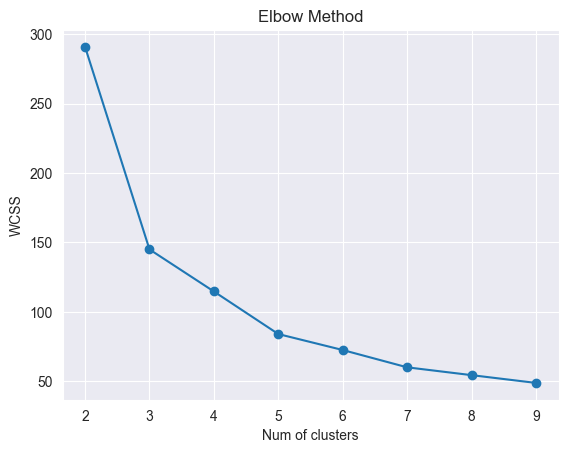

In [41]:
plt.plot(range(2 , 10) , scores , marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [42]:
s_scores = []
for k in range(2 , 10):
    model = KMeans(n_clusters=k)
    model.fit(RFM_Cluster_scaler)
    y_pred = model.predict(RFM_Cluster_scaler)
    s_scores.append(silhouette_score(RFM_Cluster_scaler ,y_pred))

In [43]:
s_scores

[0.5039276935842038,
 0.5045832447138628,
 0.4309931122402836,
 0.4420588060777085,
 0.4066286256927817,
 0.41940301871787966,
 0.38092254418873717,
 0.40637097073413764]

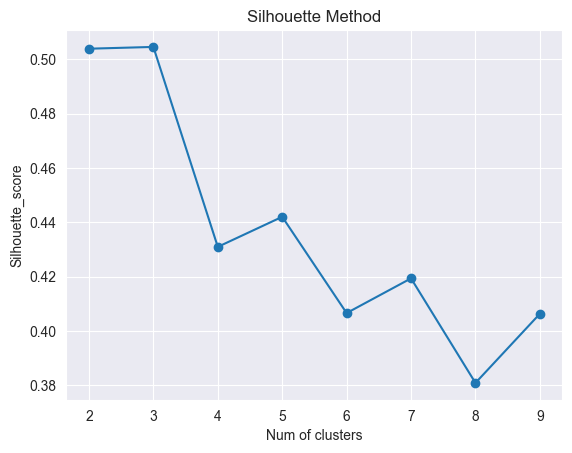

In [44]:
plt.plot(range(2 , 10) , s_scores , marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('Silhouette_score')
plt.title('Silhouette Method')
plt.show()

In [45]:
Best_KMeans = KMeans(n_clusters=2)
Best_KMeans.fit(RFM_Cluster_scaler)
y_pred_2 = Best_KMeans.predict(RFM_Cluster_scaler)
print("Score for 2 clusters            = ",Best_KMeans.inertia_)
print("Silhouette Score for 2 clusters = " , silhouette_score(RFM_Cluster_scaler ,y_pred_2))

Score for 2 clusters            =  290.90487224136643
Silhouette Score for 2 clusters =  0.5039276935842038


In [46]:
RFM_Cluster_mms['cluster_2'] = y_pred_2

In [47]:
RFM_Cluster_mms

,Recency,Frequency,Monetary,CLV,cluster_5,cluster_2
0,2,7,4310.00,5.0,4,1
1,75,4,1797.24,3.4,1,1
2,19,1,1457.55,2.8,3,1
3,310,1,334.40,1.3,2,0
4,36,7,1665.74,4.1,1,1
...,...,...,...,...,...,...
4313,278,1,180.60,1.4,2,0
4314,181,1,80.82,1.4,0,0
4315,8,2,178.05,3.0,1,1
4316,4,16,2045.53,5.0,4,1


In [48]:
RFM_Cluster_mms.reset_index(drop=True, inplace=True)
RFM_Cluster_mms.to_csv('RFM_Cluster_mms.csv', index=False)

In [49]:
joblib.dump(Best_KMeans, 'Best_KMeans.pkl')

['Best_KMeans.pkl']

# Final Data

In [50]:
cluster_by_country

,cluster_5,Customer Persona,Country,Count
0,0,VIP,Australia,30
1,0,VIP,Austria,61
2,0,VIP,Belgium,99
3,0,VIP,Brazil,32
4,0,VIP,Channel Islands,63
...,...,...,...,...
111,4,At Risk,Portugal,855
112,4,At Risk,Spain,1567
113,4,At Risk,Sweden,307
114,4,At Risk,Switzerland,508


In [51]:
cluster_by_category

,cluster_5,Customer Persona,Description,Count
0,0,VIP,4 PURPLE FLOCK DINNER CANDLES,3
1,0,VIP,DOLLY GIRL BEAKER,1
2,0,VIP,OVAL WALL MIRROR DIAMANTE,4
3,0,VIP,RED SPOT GIFT BAG LARGE,1
4,0,VIP,SET 2 TEA TOWELS I LOVE LONDON,17
...,...,...,...,...
14804,4,At Risk,ZINC T-LIGHT HOLDER STARS SMALL,144
14805,4,At Risk,ZINC TOP 2 DOOR WOODEN SHELF,6
14806,4,At Risk,ZINC WILLIE WINKIE CANDLE STICK,110
14807,4,At Risk,ZINC WIRE KITCHEN ORGANISER,7


In [52]:
cluster_validation

,cluster_5,Recency,Frequency,Monetary,ClusterSize,Customer Persona
0,0,175.575601,1.914089,592.726840,582,VIP
1,1,42.822555,3.464511,1197.292864,1268,New
2,2,293.573554,1.211570,321.175884,605,Lost
3,3,55.465665,1.344421,382.439702,932,Loyal
4,4,14.545650,11.684211,6115.572954,931,At Risk


In [53]:
probs_customers.head(2)

,CustomerID,C0,C1,C2,C3,C4
0,12347.0,0.000,0.937,0.0,0.063,0.000
1,12348.0,0.456,0.020,0.0,0.000,0.524


In [54]:
RFM_5.head(2)

,CustomerID,Recency,Frequency,Monetary,CLV,cluster_5,Customer Persona,Persona Description
0,12347.0,2,7,4310.00,5.0,4,At Risk,Customers who used to spend but haven’t purcha...
1,12348.0,75,4,1797.24,3.4,1,New,Recently acquired customers with limited purch...


In [55]:
list(RFM_5['Customer Persona'].value_counts().index)

['New', 'Loyal', 'At Risk', 'Lost', 'VIP']

In [56]:
new_data = RFM_5

In [57]:
RFM_Cluster_mms.head(2)

,Recency,Frequency,Monetary,CLV,cluster_5,cluster_2
0,2,7,4310.00,5.0,4,1
1,75,4,1797.24,3.4,1,1
